## Clustering, Density Estimation, and Principal Component Analysis

 ### K-Means Clustering
 
 L'algoritmo K-Means si pone l'obiettivo di trovare gruppi (**clusters**) di dati in uno spazio multidimensionale. Vediamo un esempio di uso dell'algoritmo K-Means. Consideriamo il dataset "Old Faithful". Il dataset contiene misurazioni sulle eruzioni del geyser Old Faithful nel Yellowstone National Park, USA. In particolare, ogni record riporta la durata di una eruzione e il tempo passato tra l'eruzione corrente e la successiva. Carichiamo il dataset:

In [1]:
from statsmodels.datasets import get_rdataset
faithful = get_rdataset('faithful')
print("Numero di record:",len(faithful.data))
faithful.data.head()

Numero di record: 272


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


Applichiamo una normalizzazione per media e deviazione standard (z-scoring) ai dati e plottiamoli:

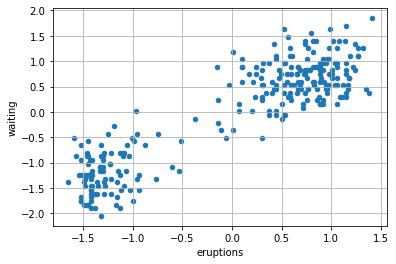

In [2]:
from matplotlib import pyplot as plt
faithful.data = (faithful.data-faithful.data.mean())/faithful.data.std()
#possiamo utilizzare la funzione "plot" dei dataframe o tutti gli altri metodi visti in precedenza
faithful.data.plot(x='eruptions',y='waiting',kind='scatter')
plt.grid()
plt.show()

> **🙋‍♂️ Domanda 1**
>
> I dati mostrati sopra presentano caratteristiche peculiari?

Alleniamo adesso l'algoritmo K-Means specificando $2$ come numero di cluster:

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(faithful.data)

/Users/furnari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

L'algoritmo K-Means ha assegnato ogni dato di training ad uno dei cluster. Possiamo accedere alla variabile degli assegmanti come segue:

In [4]:
clusters = kmeans.labels_
print(clusters)

[0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0]


Ogni elemento è stato assegnato ad uno dei due cluster identificati con $1$ o $0$. Per comodità, costruiamo un nuovo dataframe in cui rinominiamo le variabili in "X" e "Y" e aggiungiamo una variabile "C" che indica il cluster a cui ogni record è stato associato:

In [5]:
import pandas as pd
data = pd.DataFrame()
data['X'] = faithful.data['eruptions']
data['Y'] = faithful.data['waiting']
data['C'] = clusters.astype(int)
data.head()

,X,Y,C
0,0.098318,0.596025,0
1,-1.478733,-1.242890,1
2,-0.135612,0.228242,0
3,-1.055558,-0.654437,1
4,0.915755,1.037364,0


Plottiamo dunque i dati visualizzando a quale cluster sono stati associati:

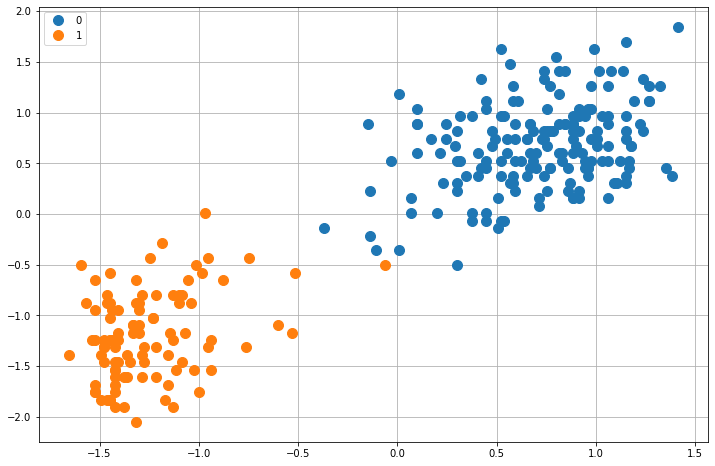

In [6]:
def plot2d(data):
    classes = sorted(data.C.unique())
    for c in classes:
        plt.plot(data.where(data.C==c).dropna().X.values,
                 data.where(data.C==c).dropna().Y.values,'o', markersize=10, label=str(c))

plt.figure(figsize=(12,8))
plot2d(data)
plt.legend()
plt.grid()
plt.show()

> **🙋‍♂️ Domanda 2**
>
> L'assegnamento dei cluster è plausibile? Si esegua più volte l'algoritmo K-Means. La soluzione cambia? Perché? Le soluzioni trovate sono equivalenti?

Possiamo accedere ai centroidi trovati dall'algoritmo K-Means come segue:

In [7]:
kmeans.cluster_centers_

array([[ 0.70839746,  0.67549972],
       [-1.25776692, -1.19935664]])

Similmente a quanto fa un algoritmo di tipo Nearest Neighbor, anche il K-Means definisce implicitamente delle regioni di decisione e un decision boundary. Vediamo di visualizzare queste informazioni nel nostro caso:

In [8]:
def plot_kmeans_decision_boundary(data, kmeans):
    plot2d(data)
    X = np.linspace(data.X.min(), data.X.max(),200)
    Y = np.linspace(data.Y.min(), data.Y.max(),200)
    X,Y = np.meshgrid(X,Y)
    
    Z = kmeans.predict(np.c_[X.ravel(), Y.ravel()])
    
    Z = np.array(Z).reshape(X.shape)
    
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap='Set3')
    
    centers = kmeans.cluster_centers_
    
    plt.plot(centers[:,0],centers[:,1],'kX',markersize=10,label='centroids')

/Users/furnari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


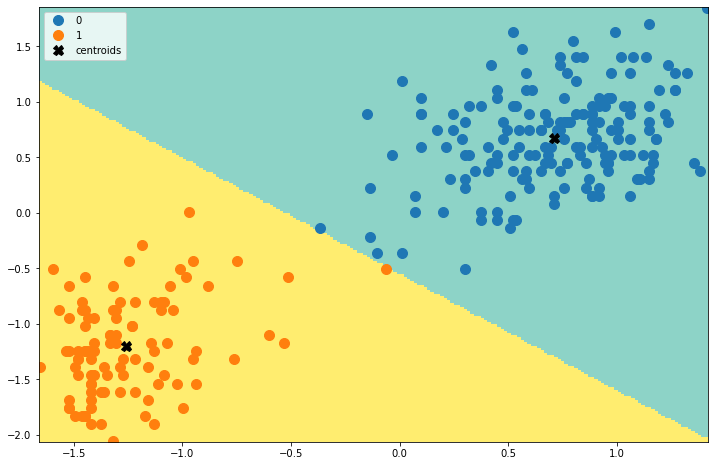

In [9]:
import numpy as np
plt.figure(figsize=(12,8))
plot_kmeans_decision_boundary(data,kmeans)
plt.legend()
plt.show()

#### Esempio con dataset DIGITS
 
Proviamo adesso ad utilizzare un dataset più grande con campioni a più dimensioni. Consideriamo il dataset "digits" di cifre scritte a mano messo a disposizione da scikit-learn:

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
print("Numero di campioni: %d, Numero di dimensioni: %d" % digits.data.shape)

Numero di campioni: 1797, Numero di dimensioni: 64


Ricordiamo che ogni elemento del dataset è un vettore di 64 dimensioni che rappresenta una immagine $8 \times 8$. Pertanto possiamo visualizzare ogni campione come una immagine mediante una operazione di _reshape_. Ad esempio:

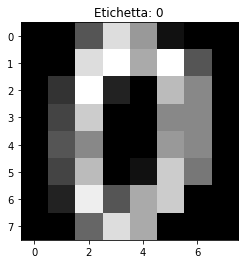

In [11]:
plt.imshow(digits.data[0].reshape((8,8)),cmap='gray')
plt.title("Etichetta: %d" % digits.target[0])
plt.show()

Supponiamo per un attimo che il dataset non sia etichettato, ma supponiamo comunque di sapere che contiene immagini delle 10 cifre scritte a mano. Proviamo a utilizzare l'algoritmo K-Means per cercare di suddividere i dati in $10$ gruppi:

In [12]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(digits.data)

/Users/furnari/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

L'algoritmo KMeans ha trovato $10$ centroidi e ha assegnato ogni campione di training a uno dei centroidi. I centroidi hanno la stessa dimensionalità dei dati in input ($64$ elementi) e pertanto anche essi possono essere visti come delle immagini $8 \times 8$. In particolare, ogni centroide è l'immagine media di tutte le immagini che sono state associate a quel cluster. Visualizziamo i 10 centroidi sotto forma di immagini:

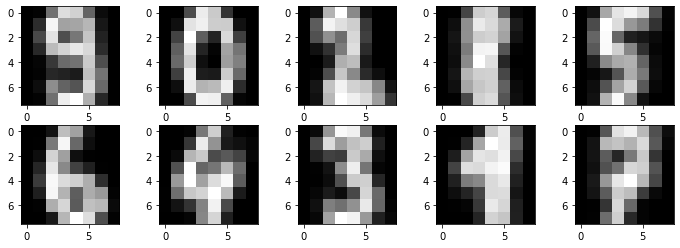

In [13]:
plt.figure(figsize=(12,4))

centroidi = kmeans.cluster_centers_

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(centroidi[i].reshape((8,8)),cmap='gray')
    
plt.show()

Ci aspetteremmo che il K-Means abbia messo in un dato cluster tutti e soli gli elementi appartenenti ad una data classe (ad esempio, un cluster dovrebbe contenere tutti e soli i campioni con etichetta "0"). In tal caso, si dice che il cluster "è puro". Diversi cluster possono avere diversi gradi di purezza.

> **🙋‍♂️ Domanda 3**
>
> Guardando alle immagini dei centroidi, possiamo prevedere quali cluster sono più puri e quali lo sono meno?

Possiamo misurare la purezza di un cluster nel seguente modo:
 * Determiniamo l'etichetta più frequente tra quelle dei campioni di training assegnati al cluster;
 * Contiamo la frazione di elementi assegnati al cluster che abbiano etichetta corrispondente a quella più frequente.
Vediamo come fare:

In [14]:
from scipy.stats import mode
cluster_assignments = kmeans.labels_

purity = np.zeros(10)
most_frequent_label = np.zeros(10)

for c in range(10):
    training_labels = digits.target[cluster_assignments==c]
    most_frequent_label[c] = mode(training_labels).mode
    purity[c] = (training_labels==most_frequent_label[c]).mean()
    
    print("Cluster %d. Most frequent label: %d. Purity: %0.2f" % (c,most_frequent_label[c],purity[c]))

Cluster 0. Most frequent label: 9. Purity: 0.58
Cluster 1. Most frequent label: 0. Purity: 0.99
Cluster 2. Most frequent label: 2. Purity: 0.84
Cluster 3. Most frequent label: 8. Purity: 0.45
Cluster 4. Most frequent label: 5. Purity: 0.87
Cluster 5. Most frequent label: 6. Purity: 0.97
Cluster 6. Most frequent label: 4. Purity: 0.99
Cluster 7. Most frequent label: 3. Purity: 0.85
Cluster 8. Most frequent label: 1. Purity: 0.60
Cluster 9. Most frequent label: 7. Purity: 0.86


Visualizziamo adesso queste informazioni insieme alle immagini relative ai centroidi:

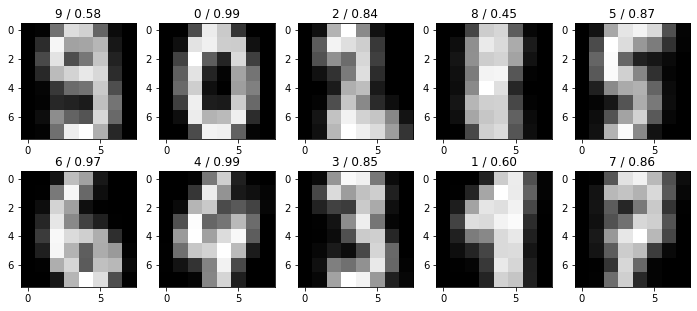

In [15]:
plt.figure(figsize=(12,5))

centroidi = kmeans.cluster_centers_

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(centroidi[i].reshape((8,8)),cmap='gray')
    plt.title("%d / %0.2f" % (most_frequent_label[i],purity[i]))
    
plt.show()

> **🙋‍♂️ Domanda 4**
>
> Le previsioni fatte in precedenza corrispondono ai valori di purezza trovati? Perché alcuni cluster sono più puri e altri lo sono meno?

### Density Estimation

#### Non-Parametric Density Estimation

##### Hexplots
Hexplots are done in Python as follows using `seaborn`:

<Figure size 720x576 with 0 Axes>

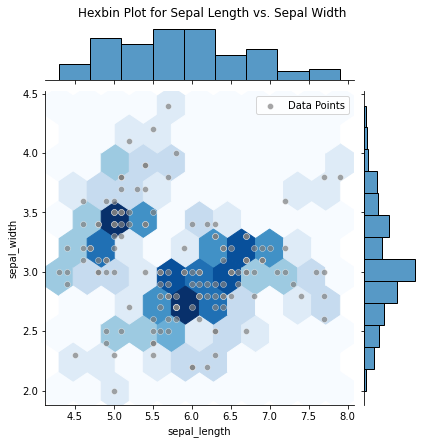

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset from seaborn
iris = sns.load_dataset("iris")

# Create a hexbin plot for sepal length vs. sepal width
plt.figure(figsize=(10, 8))

# Hexbin plot
sns.jointplot(data=iris, x="sepal_length", y="sepal_width", kind="hex", cmap="Blues")

# Scatter plot
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", alpha=0.7, color='gray', label='Data Points')


plt.suptitle('Hexbin Plot for Sepal Length vs. Sepal Width', y=1.02)
plt.show()


Alternatively, we can use `matplotlib`:

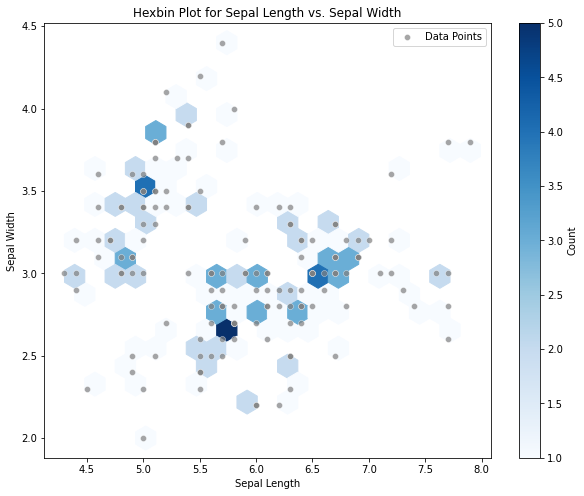

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the iris dataset from seaborn
iris = sns.load_dataset("iris")

# Create a hexbin plot for sepal length vs. sepal width
plt.figure(figsize=(10, 8))

# Hexbin plot
hb = plt.hexbin(iris["sepal_length"], iris["sepal_width"], gridsize=20, cmap="Blues", mincnt=1)

# Add a colorbar
cbar = plt.colorbar(hb)
cbar.set_label('Count')

# Scatter plot
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", alpha=0.7, color='gray', label='Data Points')


plt.title('Hexbin Plot for Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


##### Kernel Density Estimation
Kernel Density Estimation can be performed using seaborn as shown in the following example:

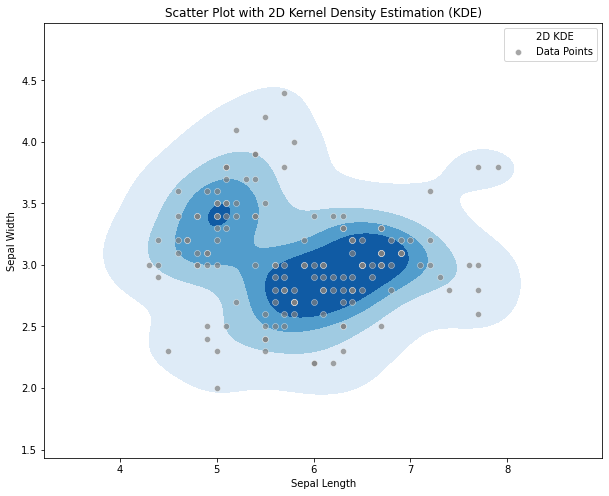

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset from seaborn
iris = sns.load_dataset("iris")

# Create a scatter plot with a 2D KDE plot for sepal length vs. sepal width
plt.figure(figsize=(10, 8))



# 2D KDE plot
sns.kdeplot(data=iris, x="sepal_length", y="sepal_width", fill=True, cmap="Blues", levels=5, label='2D KDE')

# Scatter plot
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", alpha=0.7, color='gray', label='Data Points')

plt.title('Scatter Plot with 2D Kernel Density Estimation (KDE)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


#### Parametric Methods

##### Fitting Known Distributions to Data using SciPy

When working with empirical data, it's often valuable to model the underlying probability distribution to gain insights into the data's characteristics. SciPy, a scientific library for Python, provides a convenient `scipy.stats` module that offers various probability distributions for statistical modeling.

While Scipy implements many distributions, we will see an example with the Gaussian distribution:


In [38]:
from scipy.stats import norm #the normal distribution

np.random.seed(124) # random seed

#generate a random sample
sample=np.random.normal(-2,5,1000)

# fit the gaussian to the sample
mu, sigma = norm.fit(sample)
print(mu,sigma)

-1.988335448619584 5.021959091782125


#### Gaussian Mixture Models (GMM)

L'algoritmo K-Means suddivide il training set in gruppi assegnando ognuno di essi ad un determinato centroide. Un'altra strategia consiste nel cercare di modellare la distribuzione multimodale dei dati e assegnare ogni dati alla moda più probabile. Volendo trovare $K$ clusters, supponiamo di modellare la distribuzione di dati come una mistura di $K$ Gaussiane (Mixture of Gaussians). In questo caso, la probabilità di un dato campione $\mathbf{x}$ sarà data da:

\begin{equation}
p(\mathbf{x}) = \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}\ |\ \mathbf{\mu}_k, \Sigma_k)
\end{equation}

dove:
 * $\pi_i$ sono i coefficienti della mistura di Gaussiane (i pesi delle singole Gaussiane);
 * $\mathbf{\mu}_k$ e $\mathbf{\sigma}_k$ sono le medie e covarianze delle singole Gaussiane.
 
Ogni Gaussiana del modello rappresenta uno dei cluster, mentre i coefficienti $\pi_i$ rappresentano "l'importanza" di ogni cluster. 

Il modello GMM è molto simile a quello offerto da K-Means ma con alcune importanti differenze:
 * Il modello GMM modella esplicitamente la distribuzione dei campioni in ingresso, permettendoci di calcolare per ogni campione il termine $p(x)$;
 * Il modello GMM effettua un "soft assignment" dei campioni ai cluster. A differenza di quanto avviene per K-Means, un campione non appartiene a un solo cluster (benché sia possibile determinare il cluster più probabile), ma ha una determinata probabilità di appartenere a ciascuno dei cluster considerati. Questo tipo di "soft assignment" permette di individuare i casi di incertezza (ad esempio nelle regioni di confine tra due cluster);
 * Il modello GMM modella ogni cluster con una distribuzione Gaussiana, mentre K-Means non determina esplicitamente le matrici di covarianza dei cluster, ma solo le medie. In un certo senso, è come se K-Means considerasse matrici di covarianza diagonali.

Torniamo al dataset Old Faithful e alleniamo un modello di tipo GMM su questi dati:

In [26]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=2)
gmm.fit(faithful.data)

GaussianMixture(n_components=2)

Il modello ha trovato i valori più opportuni per i parametri $\mathbf{\mu}_k$, $\Sigma_k$ e $\pi_k$. Vediamo come accedere a questi parametri:

In [27]:
print("Medie:\n",gmm.means_)
print()
print("Covarianze:\n",gmm.covariances_)
print()
print("Coefficienti:\n",gmm.weights_)

Medie:
 [[ 0.70265943  0.66733937]
 [-1.27150812 -1.20759416]]

Covarianze:
 [[[0.13035882 0.06049755]
  [0.06049755 0.19491776]]

 [[0.05317595 0.02811558]
  [0.02811558 0.18236361]]]

Coefficienti:
 [0.64407305 0.35592695]


Possiamo assegnare ogni punto al cluster più probabile come segue:

In [28]:
clusters = gmm.predict(faithful.data)
print(clusters)

[0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0]


Costruiamo un DataFrame e visualizziamo gli asssegnamenti:

In [29]:
faithful_gmm = pd.DataFrame()
faithful_gmm['X'] = faithful.data['eruptions']
faithful_gmm['Y'] = faithful.data['waiting']
faithful_gmm['C'] = clusters

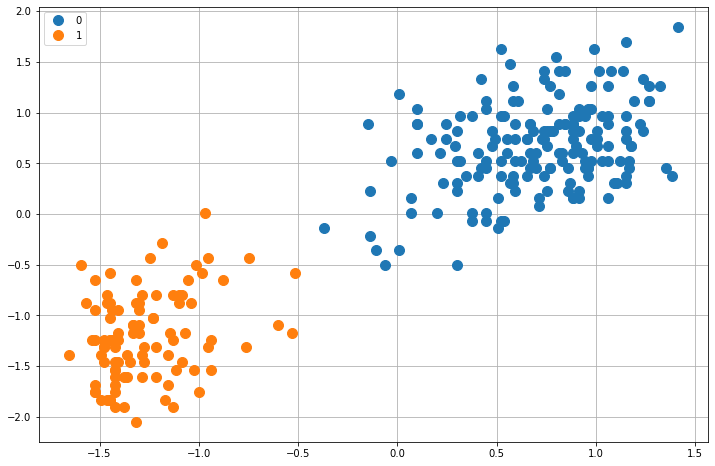

In [30]:
plt.figure(figsize=(12,8))
plot2d(faithful_gmm)
plt.grid()
plt.legend()
plt.show()

Visualizziamo le regioni di decisione trovate dal modello:

/Users/furnari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


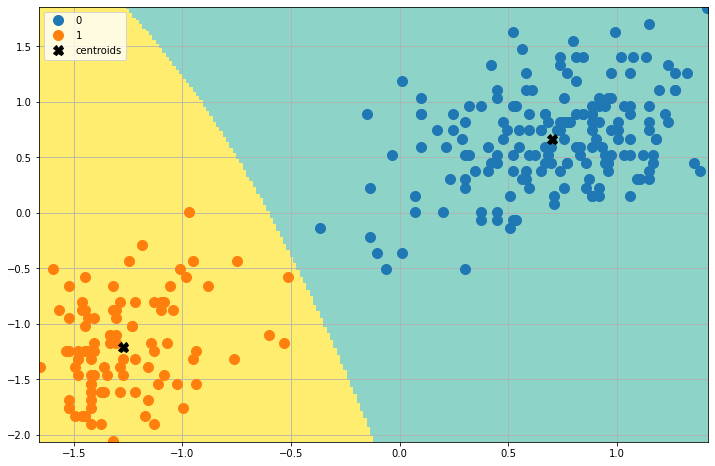

In [31]:
def plot_gmm_decision_boundary(data, gmm):
    plot2d(data)
    X = np.linspace(data.X.min(), data.X.max(),200)
    Y = np.linspace(data.Y.min(), data.Y.max(),200)
    X,Y = np.meshgrid(X,Y)
    
    Z = gmm.predict(np.c_[X.ravel(), Y.ravel()])
    
    Z = np.array(Z).reshape(X.shape)
    
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap='Set3')
    
    centers = gmm.means_
    
    plt.plot(centers[:,0],centers[:,1],'kX',markersize=10,label='centroids')

plt.figure(figsize=(12,8))
plot_gmm_decision_boundary(faithful_gmm,gmm)
plt.grid()
plt.legend()
plt.show()

> **🙋‍♂️ Domanda 5**
>
> Si confronti il decision boundary trovato dal modello GMM con quello relativo al modello K-Means. Ci sono differenze?

Abbiamo detto che il modello GMM permette di effettuare un "soft assignment" calcolando le probabilità $p(\mathbf{x}\ |\ z_k)$. Per accedere alle distribuzioni di probabilità, possiamo utilizzare il metodo `predict_proba`:

In [32]:
cluster_probabilities = gmm.predict_proba(faithful.data)
print(cluster_probabilities.shape)

(272, 2)


Per ogni elemento del dataset è stato calcolato un vettore bidimensionale che rappresenta la distribuzione di probabilità a posteriori $p(\mathbf{x}\ |\ z_k)$ per i due valori possibili di $k$. In pratica, il vettore ha componenti $[p(\mathbf{x}\ |\ z_0=1),\ p(\mathbf{x}\ |\ z_1=1)]$. Evidenziamo nel plot visto sopra i punti che presentano incertezza:

/Users/furnari/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


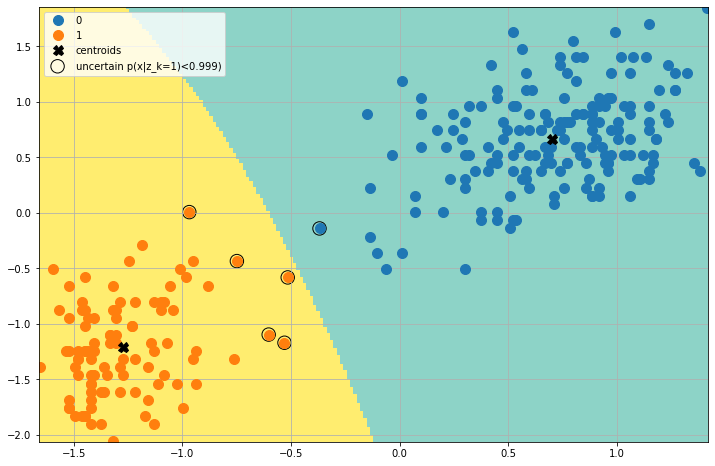

In [33]:
uncertain = cluster_probabilities.max(1)<0.999 #selezioniamo i punti a probabilità minore di 0.999

plt.figure(figsize=(12,8))
plot_gmm_decision_boundary(faithful_gmm,gmm)
plt.scatter(faithful_gmm['X'].values[uncertain],faithful_gmm['Y'].values[uncertain],180,
                facecolors='none',edgecolors='k', label='uncertain p(x|z_k=1)<0.999)')
plt.grid()
plt.legend()
plt.show()

> **🙋‍♂️ Domanda 6**
>
> Dove si trovano i punti incerti? Perché?

Ricordiamo che GMM modella i cluster come delle Gaussiane. Visualizziamo le due Gaussiane:

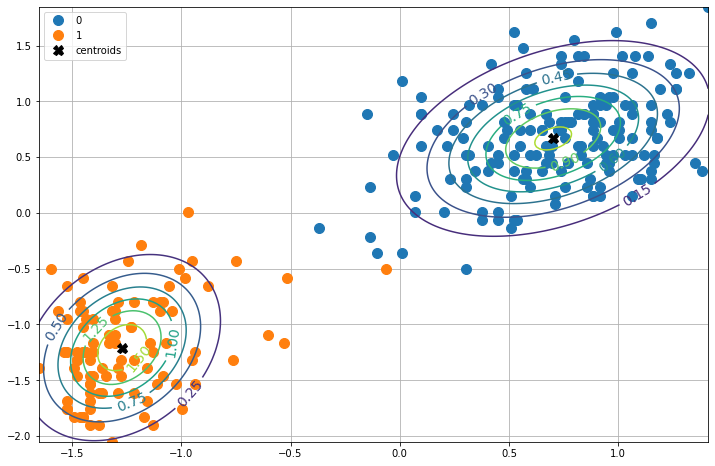

In [34]:
from scipy.stats import multivariate_normal as mnorm

plt.figure(figsize=(12,8))

#definiamo le due gaussiane multivariate
g0 = mnorm(gmm.means_[0], gmm.covariances_[0])
g1 = mnorm(gmm.means_[1], gmm.covariances_[1])

#plottiamo i dati
plot2d(data)

#costruiamo una meshgrid 
X = np.linspace(data.X.min(), data.X.max(),200)
Y = np.linspace(data.Y.min(), data.Y.max(),200)
X,Y = np.meshgrid(X,Y)

Z0 = g0.pdf(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)
Z1 = g1.pdf(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)

contour=plt.contour(X,Y,Z0)
plt.clabel(contour, fontsize=14)

contour=plt.contour(X,Y,Z1)
plt.clabel(contour, fontsize=14)

centers = gmm.means_

plt.plot(centers[:,0],centers[:,1],'kX',markersize=10,label='centroids')

plt.legend()
plt.grid()
plt.show()

### Principal Component Analysis

Iniziamo considerando un semplice set di dati 2D:

In [46]:
import pandas as pd
set2d=pd.read_csv('http://iplab.dmi.unict.it/furnari/downloads/Simple2DSet.csv')
print(len(set2d))
set2d.head()

1000


,x,y
0,6.403621,-0.742478
1,2.782241,-4.126082
2,6.354109,-2.308102
3,5.499853,-1.986180
4,5.492006,-5.074300


Il dataset contiene $1000$ elementi. Ogni record del data frame corrisponde a una coppia di valori 2D ($x$,$y$). Visualizziamoli nello spazio 2D:

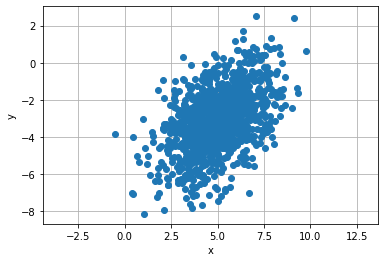

In [47]:
from matplotlib import pyplot as plt
plt.plot(set2d.x,set2d.y,'o')
plt.axis('equal') #mantiene la stessa scala sui due assi
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

> **🙋‍♂️ Domanda 7**
> 
> I dati presentano varianze diverse lungo le due variabili? Se no, quale variabile è caratterizzata da una varianza maggiore?

Applichiamo la tecnica della Principal Component Analysis ai dati. A tale scopo, ultilizzeremo l'oggetto `PCA` della libreria `scikit-learn`:

In [48]:
from sklearn.decomposition import PCA

L'oggetto `PCA` segue l'API di scikit-learn e mette a disposizione due metodi principali:
 * `fit`: prende in input $X$ e permette di calcolare i coefficienti della PCA. Il metodo `fit` non richiede che le colonne di $X$ siano a media nulla. Verranno dunque calcolare e conservate le medie delle colonne di $X$ come parte del modello;
 * `transform`: prende in input una matrice di dati (es. $X$) e la trasforma sottraendo prima le medie delle colonne calcolate da `fit` e proiettando in seguito i dati mediante $Z=XW$.

Otteniamo la matrice $X$ dal DataFrame e calcoliamo la PCA dai dati:

In [49]:
X = set2d.values
pca = PCA()
pca.fit(X)

PCA()

Visualizziamo le media delle variabili calcolate da `PCA`:

In [50]:
pca.mean_

array([ 4.98240411, -3.09411727])

Verifichiamo che esse siano in effetti le medie delle due variabili:

In [51]:
set2d.mean()

x    4.982404
y   -3.094117
dtype: float64

Visualizziamo i valori trovati per la matrice $W$. Questi vengono riferiti come "components" (le componenti principali):

In [52]:
W=pca.components_
W

array([[ 0.64514558,  0.76405967],
       [ 0.76405967, -0.64514558]])

Possiamo utilizzare l'oggetto $PCA$ per trasformare i dati:

In [53]:
Z = pca.transform(X)

#### Interpretazione dei coefficienti della PCA

I coefficienti della PCA hanno una interpretazione geometrica semplice da vedere nel caso 2D. Le due colonne della matrice $W$ rappresentano i due versori del nuovo sistema di riferimento individuato dalla PCA. Verifichiamo innanzitutto che si tratti di due versori:

In [54]:
(W**2).sum(0)

array([1., 1.])

Plottiamo adesso i due versori sul grafico raffigurante i dati, facendoli partire dal punto medio dei dati. Utilizzeremo a questo scopo la funzione `quiver` di `matplotlib` che ci permtte di rappresentare dei vettori specificando le loro componenti. Per questioni di visualizzazione, passeremo un parametro di scala alla funzione:

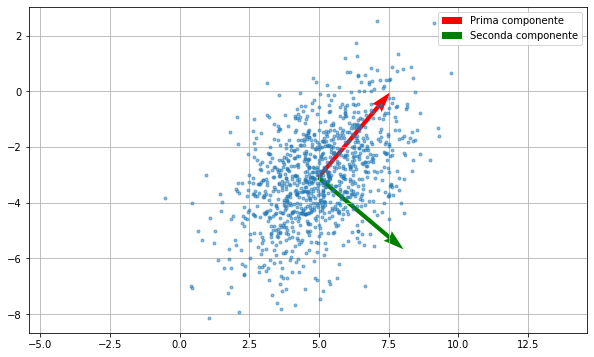

In [55]:
plt.figure(figsize=(10,6))
#specifico alpha=0.5 per visualizzare i punti in trasparenza
plt.plot(set2d.x,set2d.y,'.',alpha=0.5)
#uso la funzione quiver per plottere i vettori
plt.quiver(set2d.x.mean(),set2d.y.mean(),W[0,0],W[1,0], scale=5, color='red', label='Prima componente')
plt.quiver(set2d.x.mean(),set2d.y.mean(),W[0,1],W[1,1], scale=5, color='green', label='Seconda componente')
#impongo che gli assi abbiano la stessa scala
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

I due vettori rappresentano le due componenti principali individuati dalla PCA. In particolare, la prima componente giace lungo la direzione di massima varianza, mentre la seconda componente è perpendicolare alla prima e giace lungo la seconda direzione di massima varianza (la direzione di minima varianza in questo caso).

La proiezione dei dati verrà effettuato proiettando tutti i dati prima lungo l'asse individuato dalla prima componente e successivamente lungo l'asse individuato dalla seconda componente.

> **🙋‍♂️ Domanda 8**
> 
> Che tipo di trasformazione geometrica si può applicare ai dati per passare dal primo al secondo sistema di riferimento? Dopo la trasformazione, le distanze relative tra i punti sono preservate?

#### Rototraslazione dei dati

Plottiamo i dati e confrontiamoli con i vecchi:

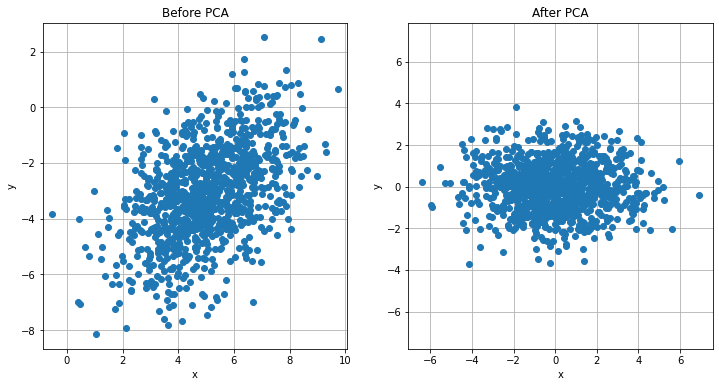

In [56]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title('Before PCA')
plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal') #mantiene la stessa scala sui due assi
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.title('After PCA')
plt.plot(Z[:,0],Z[:,1],'o')
plt.axis('equal') #mantiene la stessa scala sui due assi
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

> **🙋‍♂️ Domanda 9**
> 
> Quali sono le principali differenze tra i due set di dati? In quale dei due set la varianza lungo l'asse $x$ è massima? In quale dei due set si nota una correlazione lineare? 

In pratica, i dati sono stati roto-traslati. In particolare, essi sono stati traslati lungo i due assi $x$ e $y$ in modo da avere media nulla e ruotati in modo che la varianza massima si trovi sull'asse $x$. Ciò fa anche in modo che i dati siano decorrelati.

#### Decorrelazione dei dati

Calcoliamo le matrici di covarianza dei due set di dati:

In [57]:
import numpy as np
print(np.cov(X.T))
print()
print(np.cov(Z.T))

[[2.45531835 1.25551632]
 [1.25551632 2.88213855]]

[[3.94225312e+00 1.67144688e-16]
 [1.67144688e-16 1.39520377e+00]]


La matrice di covarianza di $Z$ non è perfettamente diagonale ma, come si può notare, gli elementi al di fuori della diagonale principale sono quasi nulli.

> **🙋‍♂️ Domanda 10**
> 
> Che caratteristiche ha la matrice di correlazione costruita con l'indice di correlazione di Pearson a partire da `Z`? Si utilizzi la funzione `corrcoef` di `numpy` per calcolarla.

#### Riduzione della dimensionalità
Vediamo adesso un semplicissimo esempio di riduzione della dimensionalità sui dati 2D. Nello specifico, proietteremo i dati sulla prima componente principale. Per farlo, `scikit-learn` ci permette di specificare un parametro `n_components` al costruttore di `PCA`:

In [58]:
pca1d = PCA(n_components=1)
pca1d.fit(X)

PCA(n_components=1)

Vediamo quali componenti sono stati trovate:

In [59]:
pca1d.components_

array([[0.64514558, 0.76405967]])

Si tratta della prima riga della matrice `W` nel caso della PCA con entrambe le componenti. Verifichiamolo:

In [60]:
print(pca1d.components_)
print(pca.components_)

[[0.64514558 0.76405967]]
[[ 0.64514558  0.76405967]
 [ 0.76405967 -0.64514558]]


Effettuiamo la proiezione dei dati:

In [61]:
Z1 = pca1d.transform(X)
Z1.shape

(1000, 1)

I valori ottenuti sono adesso unidimensionali. Tuttavia, in questa operazione, abbiamo perso dell'informazione. Possiamo misurare quanta varianza abbiamo perso dividendo la varianza dei dati proiettati per la varianza totale dei dati prima della trasformazione:

In [62]:
#sommiamo le varianze delle due variabili per ottenere la varianza totale
varianza_totale = set2d.x.var()+set2d.y.var()
varianza_mantenuta = np.var(Z1)

#moltiplichiamo per cento per ottenere un valore in percentuale
print("Percentuale di varianza mantenuta: %0.2f%%" % (varianza_mantenuta*100/varianza_totale))
print("Percentuale di varianza persa: %0.2f%%" % (100-varianza_mantenuta*100/varianza_totale))

Percentuale di varianza mantenuta: 73.79%
Percentuale di varianza persa: 26.21%


In pratica, `scikit-learn` calcola per noi la percentuale di varianza "spiegata" dalla componente i-esima:

In [63]:
pca.explained_variance_ratio_

array([0.7386014, 0.2613986])

Nella componente i-esima del vettore, è riportata la varianza spiegata dalla componente principale i-esima. Se vogliamo sapere quanta varianza manteniamo troncando alla i-esima componente, possiamo applicare `cumsum`:

In [64]:
np.cumsum(pca.explained_variance_ratio_)

array([0.7386014, 1.       ])

In questo caso, troncando alla prima componente manteniamo circa il $73.86\%$ dell'informazione. Troncando alla seconda componente (e dunque tenendole tutte), manteniamo il $100\%$ dell'informazione.

> **🙋‍♂️ Domanda 11**
> 
> Perché manteniamo il $100\%$ dell'informazione mantenendo le prime due componenti?

#### PCA per la compressione dei dati
Vediamo adesso un semplice esempio di compressione dati mediante PCA. In particolare, considereremo il caso della compressione di immagini. Una immagine può essere vista come un dato ad alta dimensionalità, dove il numero di dimensioni è pari al numero di pixel. Ad esempio, una immagine RGB di dimensioni $640 \times 480$ pixel, ha $3 \cdot 640 \cdot 480=921600$ dimensioni. Ci aspettiamo che in tutte queste dimensioni ci saranno delle informazioni ridondanti. Un metodo per comprimere le immagini, consiste nel suddividerle in blocchi di dimensione fissa (es. $8 \times 8$). Ognuno di questi blocchetti costituirà un elemento che fa parte di una popolazione (la popolazione dei blocchetti $8 \times 8$ dell'immagine. Supponendo che l'informazione nei blocchetti sia molto correlata, possiamo provare a comprimerla applicando la PCA alla popolazione dei blocchetti e scegliendo solo alcune componenti principali per rappresentare il contenuto dei blocchetti.

Iniziamo caricando una immagine di esempio  mediante `scikit-learn`:

Dimensioni dell'immagine: (427, 640, 3)
Numero di dimensioni: 819840


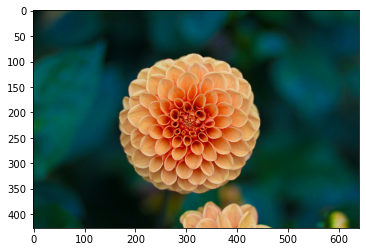

In [65]:
from sklearn.datasets import load_sample_image
flower = load_sample_image('flower.jpg')
print("Dimensioni dell'immagine:",flower.shape)
print("Numero di dimensioni:",np.prod(flower.shape))
plt.imshow(flower)
plt.show()

Divideremo l'immagine in blocchi RGB di dimensioni $8 \times 8 \times 3$ (si tratta di immagini RGB $8\times 8$). Iniziamo trasformando l'immagine in un vettore monodimensionale:

In [66]:
flower_monodimensionale = flower.ravel()
print(flower_monodimensionale.size)

819840


Calcoliamo quanti blocchi $8 \times 8 \times 3$ entrano nell'immagine:

In [67]:
flower_monodimensionale.size/(8*8*3)

4270.0

Utiliziamo la funzione di numpy `split` per suddividere il vettore monodimensionale in $4270$ parti uguali. Questo metodo restituisce una lista. Utilizziamo `stack` di numpy per trasformare la lista di vettori in una matrice:

In [68]:
tiles = np.split(flower.ravel(),4270)
tiles=np.stack(tiles)
tiles.shape

(4270, 192)

Abbiamo ottenuto $4270$ vettori di $192 = 8 \times 8 \times 3$ unità. Ognuno dei vettori è un blocchetto dell'immgine. Proviamo a visualizzarne qualcuno:

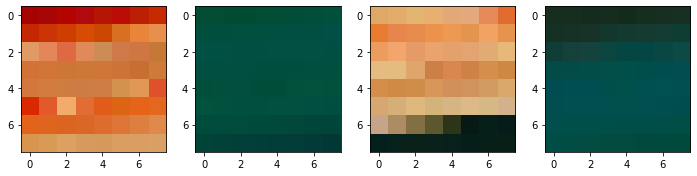

In [69]:
plt.figure(figsize=(12,8))
plt.subplot(141)
plt.imshow(tiles[1855].reshape(8,8,3))
plt.subplot(142)
plt.imshow(tiles[2900].reshape(8,8,3))
plt.subplot(143)
plt.imshow(tiles[1856].reshape(8,8,3))
plt.subplot(144)
plt.imshow(tiles[960].reshape(8,8,3))
plt.show()

> **🙋‍♂️ Domanda 12**
> 
> Si nota ridondanza nei valori contenuti nei blocchetti?

Calcoliamo la PCA di tiles:

In [70]:
pca=PCA()
pca.fit(tiles)

PCA()

Verifichiamo quanta informazione si perde scartando le varie componenti:

In [71]:
np.cumsum(pca.explained_variance_ratio_)[:32] #stampiamo solo i valori relativi alle prime 32 componenti

array([0.72033322, 0.8054948 , 0.88473857, 0.91106289, 0.92773705,
       0.94002709, 0.94742984, 0.95262262, 0.95724086, 0.96138203,
       0.96493482, 0.96813026, 0.97074765, 0.97304417, 0.97502487,
       0.97676849, 0.97827393, 0.97961611, 0.98080084, 0.98195037,
       0.98298693, 0.98399279, 0.98491245, 0.98570784, 0.98649079,
       0.98719466, 0.98779928, 0.98835152, 0.98888528, 0.98937606,
       0.98983658, 0.99027875])

Come possiamo vedere, troncare alla prima componente ci permette di mantenere circa il $72\%$ dell'informazione, troncare alla seconda ci permette di mantenere circa l'$80\%$ e così via, fino a $32$ componenti, che ci permettono di mantenere circa il $99\%$ dell'informazione. Vediamo adesso come comprimere e ricostruire l'immagine. Sceglieremo le prime $32$ componenti, che preservano il $99\%$ dell'informazione:

In [72]:
pca = PCA(n_components=32)
pca.fit(tiles)
compressed_tiles = pca.transform(tiles)
compressed_tiles.shape

(4270, 32)

Abbiamo ottenuto una matrice molto più piccola di quella di partenza. Calcoliamo la percentuale di spazio salvato:

In [73]:
print("Spazio salvato nella compressione: {:0.2f}%".format(100-100*compressed_tiles.size/tiles.size))

Spazio salvato nella compressione: 83.33%


Ricostruiamo adesso l'immagine dalla sua rappresentazione compressa. Per fare ciò `scikit-learn` mette a disposizione il metodo `inverse_transform`:

In [74]:
reconstructed_tiles = pca.inverse_transform(compressed_tiles)
reconstructed_tiles.shape

(4270, 192)

Adesso dobbiamo effettuare i passi inversi per ricomporre l'immagine dalle tiles. Iniziamo normalizzando i valori tra $0$ e $255$. Ciò è necessario per evitare warning (dopo la PCA, i valori RGB potrebbero avere un range leggermente diverso):

In [75]:
reconstructed_tiles = (reconstructed_tiles-reconstructed_tiles.min())\
            /(reconstructed_tiles.max()-reconstructed_tiles.min())*255
#convertiamo il tipo dei dati da float a uint8
reconstructed_tiles=reconstructed_tiles.astype('uint8')

ricomponiamo l'immagine mediante un reshape e visualizziamola vicino all'originale:

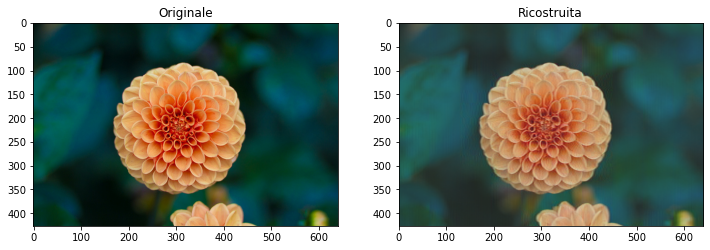

In [76]:
reconstructed_flower=reconstructed_tiles.ravel().reshape(flower.shape)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Originale')
plt.imshow(flower)
plt.subplot(1,2,2)
plt.title('Ricostruita')
plt.imshow(reconstructed_flower)
plt.show()

> **🙋‍♂️ Domanda 13**
> 
> Si provi a comprimere e ricostruire l'immagine con un numero di componenti diverso. Esistono numeri che permettono di ottenere buoni risultati salvando comunque spazio?

#### PCA per la visualizzazione dei dati

La PCA viene utilizzata anche per permettere di visualizzare dati multidimensionali, ad esempio per avere un'idea di come essi si distribuiscono nello spazio. Consideriamo ad esempio il dataset "digits" messo a disposizione della libreria **scikit-learn**:

In [77]:
from sklearn.datasets import load_digits
digits=load_digits()

Si tratta di un dataset di immagini di dimensione $8 \times 8$ pixel raffiguranti numeri scritti a mano. Visualizziamone la descrizione:

In [78]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Le immagini dei caratteri sono contenuti sotto forma di vettori unidimensionali di $64$ elementi. Ad ogni elemento è associata una classe. Visualizziamo un elemento del dataset:

Classe corrispondente: 0


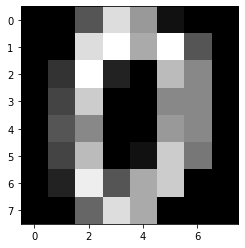

In [79]:
#gli elementi sono contenuti all'interno di digits.data
#si tratta di vettori 1x64, che devono essere trasformati in vettori 8x8 per la visualizzazione
plt.imshow(digits.data[0].reshape((8,8)),cmap='gray')
#le classi sono contenute all'interno di digits.target
print("Classe corrispondente:",digits.target[0])
plt.show()

Per capire come i dati si distribuiscono nello spazio, potremmo visualizzarli nello spazio bidimensionale. Per farlo dobbiamo scartare $62$ dimensioni e tenerne $2$. Per essere sicuri di considerare le due dimensioni "più importanti", trasformiamo prima i dati mediante PCA per "riordinarne" le dimensioni:

In [80]:
#dato che vogliamo solo le prime due componenti principali
#possiamo specificare n_components=2
pca=PCA(n_components=2)
pca.fit(digits.data)
Y=pca.transform(digits.data)

Effettuiamo dunque il plot, classe per classe:

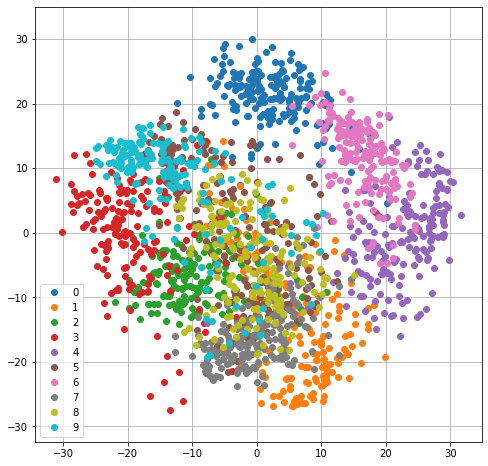

In [81]:
plt.figure(figsize=(8,8))
legend = []
for c in np.unique(digits.target):
    plt.plot(Y[digits.target==c,0],Y[digits.target==c,1],'o')
    legend.append(c)

plt.legend(legend)
plt.grid()
plt.axis('equal')
plt.show()

> **🙋‍♂️ Domanda 14**
> 
> Evinciamo qualche tipo di regolarità dei dati dal grafico sopra?

### Esercizi

> 🧑‍💻 Esercizio 1
> 
> Si consideri il dataset Boston. Si applichi il K-Means ai dati della variabile `medv`. Si inserisca dunque una nuova colonna `priceRange` nel dataset che contenga i cluster associati ai relativi valori di `medv`. Si suddivida il dataset in training e test set e si alleni un K-NN (trovare un K opportuno) per predire i valori di `priceRange` a partire da tutte le variabili tranne `medv`. Si discutano i risultati ottenuti.

> 🧑‍💻 Esercizio 2
> 
> Si utilizzi un modello GMM per clusterizzare il dataset digits come fatto in precedenza nel caso del K-Means. Si visualizzino le immagini relative alle medie trovate e si calcoli la purezza di ogni cluster. I risultati ottenuti mediante GMM e K-Means sono qualitativamente diversi? Calcoli la purezza media del cluster nei due casi. Ci sono differenze?

> 🧑‍💻 Esercizio 3
> 
> Si consideri il dataset Titanic. Si applichi la PCA a tutte le variabili eccetto `Survived`. Quante componenti bisogna mantenere per conservare il $90\%$ della varianza?

> 🧑‍💻 Esercizio 4
> 
> Si calcolino i coefficienti della PCA con il numero di componenti trovate nell'esercizio precedente. Si proiettino i dati mediante PCA. Si calcolino dunque due regressori logistici per predire i valori di `Survived` a partire dai dati originali e a partire dai dati trasformati. Quale dei due regressori lineari è migliore?

> 🧑‍💻 Esercizio 5
> 
> Si proiettino i dati del dataset Titanic sulle due componenti principali. Si plottino i dati come punti nello spazio 2D distinguendo gli elementi appartenenti alla classe `Survived` e quelli non appartenenti a tale classe. Le classi sono ben separabili?